In [1]:
# Build a random forest classifier to predict the risk of heart disease based on a dataset of patient 
# information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, 
# resting blood pressure, serum cholesterol, and maximum heart rate achieved.

# Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
# usp=share_link

# Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the 
# numerical features if necessary.

# Q2. Split the dataset into a training set (70%) and a test set (30%).

# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each 
# tree. Use the default values for other hyperparameters.

# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score. 

# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart 
# disease risk. Visualise the feature importances using a bar chart.

# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try 
# different values of the number of trees, maximum depth, minimum samples split, and minimum samples 
# leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

# Q7. Report the best set of hyperparameters found by the search and the corresponding performance 
# metrics. Compare the performance of the tuned model with the default model.

# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the 
# decision boundaries on a scatter plot of two of the most important features. Discuss the insights and 
# limitations of the model for predicting heart disease risk.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# Load the dataset
dataset_path = 'dataset.csv'  
df = pd.read_csv(dataset_path)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In this data there is only numerical feature

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is not an missing value

In [8]:
## Split the dataset into a training set (70%) and a test set (30%).
from sklearn.model_selection import train_test_split

In [14]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('target', axis=1)  
y = df['target']  

In [12]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [15]:
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [18]:
# Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82


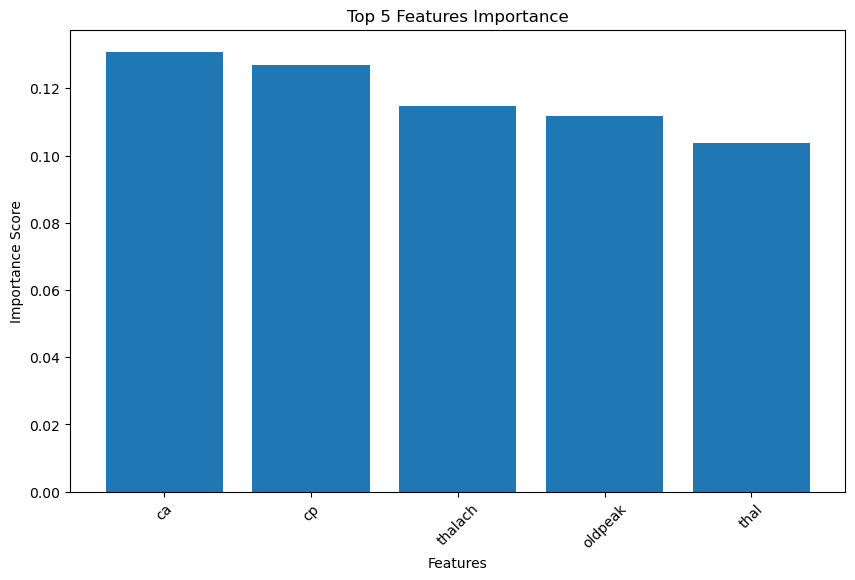

In [19]:
# Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk.
# Visualise the feature importances using a bar chart.

import matplotlib.pyplot as plt

# Get feature importances
importances = rf_classifier.feature_importances_

# Get the indices of the top 5 features
top_indices = importances.argsort()[-5:][::-1]

# Get the names of the top 5 features
top_features = X.columns[top_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_features, importances[top_indices])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 5 Features Importance')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Tune the hyperparameters of the random forest classifier using grid search or random search. Try 
# different values of the number of trees, maximum depth, minimum samples split, and minimum samples 
# leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [21]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [22]:
# Create a grid search object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

In [23]:
# Perform grid search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [24]:
# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [26]:
best_params

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [27]:
best_model

RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=42)

In [28]:
# Evaluate the best model using the test set
accuracy = best_model.score(X_test, y_test)

In [30]:
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.8351648351648352


In [33]:
# Report the best set of hyperparameters found by the search and the corresponding performance 
# metrics. Compare the performance of the tuned model with the default model.
# Get the best hyperparameters and the corresponding model

# Train the random forest classifier on the training set
rf_classifier.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model using the test set
best_accuracy = best_model.score(X_test, y_test)

# Evaluate the default model using the test set
default_accuracy = rf_classifier.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Accuracy of the Best Model on Test Set:", best_accuracy)
print("Accuracy of the Default Model on Test Set:", default_accuracy)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of the Best Model on Test Set: 0.8351648351648352
Accuracy of the Default Model on Test Set: 0.8241758241758241


In [37]:
# Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the 
# decision boundaries on a scatter plot of two of the most important features. Discuss the insights and 
# limitations of the model for predicting heart disease risk.
